# Project Description
In this notebook we explore several graph algorithms as well as random forest regression.
The main tool to implement out graph algorithms will be the graph DataBase Neo4j.

### Data Scraping 

In [2]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options 
import time
import urllib.parse as urlparse
from urllib.parse import parse_qs
import sys
import sklearn 
import seaborn as sns

import pandas as pd



In [3]:
url = 'https://wunderflats.com/en/furnished-apartments/berlin?gclid=CjwKCAjwlYCHBhAQEiwA4K21m5VsblhLrSgiwWlvVPian3aFWgUtevD0bX7tKthBj4oCZKuaSFdGMBoC8P8QAvD_BwE'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'lxml')

#soup.find( class_ = "body" )
print ('HI')

HI


In [4]:
mydivs = soup.findAll("div", {"class": "ListingsList-item"})
div = soup.find('article', class_="ListingsList")
pag = soup.find('nav', class_="Pagination")


prices = div.findAll('span', class_='ListingPrice-price')
pricecolumn = []
for price in prices:
    pricecolumn.append(price.text)

rooms = div.findAll('span', class_='ListingDetailsBrief-rooms')
roomscolumn = []
for room in rooms:
    roomscolumn.append(room.text)
    
beds = div.findAll('span', class_='ListingDetailsBrief-beds')
bedscolumn = []
for bed in beds:
    bedscolumn.append(bed.text)

area = div.findAll('span', class_='ListingDetailsBrief-area')
areacolumn = []
for ar in area:
    areacolumn.append(ar.text)
    

webcolumn = []
descriptions= []


for item in div:
    webcolumn.append('https://wunderflats.com' +item.select('a')[0]['href'] )
    descriptions.append(item.select('a')[0]['title'])
table = pd.DataFrame()
data = {'Description':descriptions,
        'Price (Eur)':pricecolumn,
        'Number of Rooms':roomscolumn,
        'Number of Beds':bedscolumn,
        'Area in (sqm)':areacolumn,
        'Website':webcolumn}
 
# Convert the dictionary into DataFrame 
#data

df = pd.DataFrame(data)
#r = df.append(df, ignore_index=True)
#r
print ('https://wunderflats.com' + pag.select('a')[2]['href'])

https://wunderflats.com/en/furnished-apartments/berlin/25?gclid=CjwKCAjwlYCHBhAQEiwA4K21m5VsblhLrSgiwWlvVPian3aFWgUtevD0bX7tKthBj4oCZKuaSFdGMBoC8P8QAvD_BwE


In [274]:
df[[ 'Number of Rooms','Number of Beds','Area in (sqm)','Price (Eur)']]


,Number of Rooms,Number of Beds,Area in (sqm),Price (Eur)
0,2,1,53 m²,"€1,540"
1,1,1,25 m²,€920
2,2,1,56 m²,"€1,270"
3,2,1,127 m²,"€3,950"
4,1,1,55 m²,"€1,600"
5,3,2,103 m²,"€2,550"
6,2,4,66 m²,"€2,200"
7,2,1,60 m²,"€1,500"
8,2,2,74 m²,"€2,150"
9,1,1,35 m²,"€1,400"


In [5]:

for item in div:
    try:
        print (item.select('a')[0]['title'])
        
        print ('Price: '+ div.find('span', class_='ListingPrice-price').text)
        
        print ('Rooms: ' +div.find('span', class_='ListingDetailsBrief-rooms').text)
        
        print ('Beds: ' +div.find('span', class_='ListingDetailsBrief-beds').text)
        
        print ('Beds: ' +div.find('span', class_='ListingDetailsBrief-area').text)
        
                
        print ('Website:  ' )
        
        print ('https://wunderflats.com' +item.select('a')[0]['href'] + '\n _________ 00000 ________ \n')
        

        
    
    except Exception as e:
        print('')
               
    #print (item)
    #print ('_______________kkkk__________')

Pretty, awesome home in Kreuzberg
Price: €1,500
Rooms: 1
Beds: 1
Beds: 38 m²
Website:  
https://wunderflats.com/en/furnished-apartment/pretty-awesome-home-in-kreuzberg/60fd4f5087f4f10008967500?dataLayerKey=RKbAGcRFhSwL4_jAqTXla
 _________ 00000 ________ 

Living in BERLIN Mitte - Great serviced apartment at Gleisdreieckpark
Price: €1,500
Rooms: 1
Beds: 1
Beds: 38 m²
Website:  
https://wunderflats.com/en/furnished-apartment/g/living-in-berlin-mitte-great-serviced-apartment-at-gleisdreieckpark/oHTSmJnQN?dataLayerKey=RKbAGcRFhSwL4_jAqTXla
 _________ 00000 ________ 

Awesome and beautiful twin studio in Karlshorst (Berlin)
Price: €1,500
Rooms: 1
Beds: 1
Beds: 38 m²
Website:  
https://wunderflats.com/en/furnished-apartment/g/awesome-and-beautiful-twin-studio-in-karlshorst-berlin/ByhN4X-6l?dataLayerKey=RKbAGcRFhSwL4_jAqTXla
 _________ 00000 ________ 

Superior Apartment in Berlin-Mitte
Price: €1,500
Rooms: 1
Beds: 1
Beds: 38 m²
Website:  
https://wunderflats.com/en/furnished-apartment/superi

In [6]:
def getnextpage(url):
    if type(soup.find("a", {"class": "Pagination-item Pagination-next disabled"})) == type(None):
        page = 'https://wunderflats.com' + pag.select('a')[3]['href']
        return page
    else:
        return
    

In [7]:
def tablepage(soup):
    
    
    ## Find  the list ##
    div = soup.find('article', class_="ListingsList")
    
    
    ###Price List
    prices = div.findAll('span', class_='ListingPrice-price')
    pricecolumn = []
    for price in prices:
        pricecolumn.append(price.text)
    
    ###Room List
    rooms = div.findAll('span', class_='ListingDetailsBrief-rooms')
    roomscolumn = []
    for room in rooms:
        roomscolumn.append(room.text)
    
    ###Bed number List
    beds = div.findAll('span', class_='ListingDetailsBrief-beds')
    bedscolumn = []
    for bed in beds:
        bedscolumn.append(bed.text)

    area = div.findAll('span', class_='ListingDetailsBrief-area')
    areacolumn = []
    for ar in area:
        areacolumn.append(ar.text)
    

    webcolumn = []
    descriptions= []


    for item in div:
        webcolumn.append('https://wunderflats.com' +item.select('a')[0]['href'] )
        descriptions.append(item.select('a')[0]['title'])
    
    table = pd.DataFrame()
    data = {'Description':descriptions,
        'Price (Eur)':pricecolumn,
        'Number of Rooms':roomscolumn,
        'Number of Beds':bedscolumn,
        'Area in (sqm)':areacolumn,
        'Website':webcolumn}
 
    # Convert the dictionary into DataFrame 
    #data

    df = pd.DataFrame(data)
    
    
    return(df)



    

In [8]:
data =  pd.DataFrame({'Description':[],
        'Price (Eur)':[],
        'Number of Rooms':[],
        'Number of Beds':[],
        'Area in (sqm)':[],
        'Website':[]})
url = 'https://wunderflats.com/en/furnished-apartments/berlin?gclid=CjwKCAjwlYCHBhAQEiwA4K21m5VsblhLrSgiwWlvVPian3aFWgUtevD0bX7tKthBj4oCZKuaSFdGMBoC8P8QAvD_BwE'
i = 0

url = 'https://wunderflats.com/en/furnished-apartments/berlin?gclid=CjwKCAjwlYCHBhAQEiwA4K21m5VsblhLrSgiwWlvVPian3aFWgUtevD0bX7tKthBj4oCZKuaSFdGMBoC8P8QAvD_BwE'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

data = data.append(tablepage(soup),ignore_index=True)
data.head()

,Description,Price (Eur),Number of Rooms,Number of Beds,Area in (sqm),Website
0,"Pretty, awesome home in Kreuzberg","€1,500",1,1,38 m²,https://wunderflats.com/en/furnished-apartment...
1,Living in BERLIN Mitte - Great serviced apartm...,"€1,050",1,1,27 m²,https://wunderflats.com/en/furnished-apartment...
2,Awesome and beautiful twin studio in Karlshors...,"€1,200",1,1,25 m²,https://wunderflats.com/en/furnished-apartment...
3,Superior Apartment in Berlin-Mitte,"€1,550",1,1,45 m²,https://wunderflats.com/en/furnished-apartment...
4,Nice & lovely home in nice area,"€1,250",1,1,36 m²,https://wunderflats.com/en/furnished-apartment...


In [9]:
###Empty Data
data =  pd.DataFrame({'Description':[],
        'Price (Eur)':[],
        'Number of Rooms':[],
        'Number of Beds':[],
        'Area in (sqm)':[],
        'Website':[]})
url = 'https://wunderflats.com/en/furnished-apartments/berlin?gclid=CjwKCAjwlYCHBhAQEiwA4K21m5VsblhLrSgiwWlvVPian3aFWgUtevD0bX7tKthBj4oCZKuaSFdGMBoC8P8QAvD_BwE'
i = 0
                     
while True:
    
    ### Parsing ###
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    data = data.append(tablepage(soup),ignore_index=True)
    pag = soup.find('nav', class_="Pagination")
    if  type(soup.find("a", {"class": "Pagination-item Pagination-next disabled"})) == type(None) and i<36:
        
        if i < 2:
            url = 'https://wunderflats.com' +pag.select('a')[len(pag)-2]['href'] 
            
        else:
            url = 'https://wunderflats.com' +pag.select('a')[len(pag)-3]['href']
            
        i = i+1
        
    else:
        break
data.tail(60)
    
#data.head(10)
     #if False:
        #type(soup.find("a", {"class": "Pagination-item Pagination-next disabled"})) == type(None):
        #url = 'https://wunderflats.com' + pag.select('a')[3]['href']
    #else:
        #break


,Description,Price (Eur),Number of Rooms,Number of Beds,Area in (sqm),Website
663,"Great, awesome loft (Kreuzberg)","€2,550",3,2,85.48 m²,https://wunderflats.com/en/furnished-apartment...
664,2 room apartment in Schöneberg/Friedenau with ...,"€1,600",2,1,72 m²,https://wunderflats.com/en/furnished-apartment...
665,Beautiful B&B for your own use,"€14,000",8,6,330 m²,https://wunderflats.com/en/furnished-apartment...
666,Fresh furnished and refurbished 2-room-apartme...,"€1,595",2,2,65 m²,https://wunderflats.com/en/furnished-apartment...
667,Awesome and wonderful suite,"€1,490",1,1,30 m²,https://wunderflats.com/en/furnished-apartment...
668,2 room apartment with upscale furnishings and ...,"€2,493",2,1,61.4 m²,https://wunderflats.com/en/furnished-apartment...
669,Beautiful suite in Friedenau,"€1,180",3,1,55 m²,https://wunderflats.com/en/furnished-apartment...
670,Awesome home in Kreuzberg,"€1,930",3,1,67 m²,https://wunderflats.com/en/furnished-apartment...
671,"Bright loft in Niederschönhausen, Berlin","€2,950",4,4,100 m²,https://wunderflats.com/en/furnished-apartment...
672,Lovely loft located in Rudow,"€1,500",2,1,50 m²,https://wunderflats.com/en/furnished-apartment...


## Coordinates

In [10]:
import requests, re
data.Website[1]

'https://wunderflats.com/en/furnished-apartment/g/living-in-berlin-mitte-great-serviced-apartment-at-gleisdreieckpark/oHTSmJnQN?dataLayerKey=Im7qrE5cbw1xcY1pLzN8L'

In [11]:
import json

In [369]:
p_lat.findall(r.text)

[]

In [12]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\49176\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\49176\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
text = 'Cute & amazing home in Wilmersdorf'
tok = nltk.word_tokenize(text)
tag = nltk.pos_tag(tok)
print(tag)
for i in range(len(tag)):
    if tag[i][1] == 'NNP':
        print (tag[i][0])

[('Cute', 'NNP'), ('&', 'CC'), ('amazing', 'JJ'), ('home', 'NN'), ('in', 'IN'), ('Wilmersdorf', 'NNP')]
Cute
Wilmersdorf


In [15]:
Adjetives = []
Personal_Pronuoun = []
Nouns = []

for i in range(len(data)):
    text = data.Description[i]
    tok = nltk.word_tokenize(text)
    tag = nltk.pos_tag(tok)
    AD =[]
    PP = []
    NN = []
    for j in range(len(tag)):
        if tag[j][1] == 'NNP':
            PP.append(tag[j][0])
        if tag[j][1] == 'NN':
            NN.append(tag[j][0])
        if tag[j][1] == 'JJ':
            AD.append(tag[j][0])
    Adjetives.append(AD)
    Personal_Pronuoun.append(PP)
    Nouns.append(NN)
    
            

    
    

    
    

In [185]:
Nouns

[['apartment', 'close'],
 ['simple', 'room'],
 ['cozy', 'loft'],
 ['homelike', 'apartment'],
 ['Great', 'apartment'],
 ['awesome'],
 ['apartment', 'heart', 'balcony'],
 ['high-quality', 'apartment', 'location', 'balcony'],
 ['studio'],
 ['studio', 'area'],
 ['heart', 'perfect'],
 ['apartment', 'floor', 'elevator', 'apartment', 'house'],
 ['apartment'],
 ['room', 'apartment', 'middle'],
 ['suite'],
 ['suite'],
 ['apartment', 'access', 'roof', 'terrace'],
 ['studio', 'location'],
 ['apartment'],
 ['home', 'heart'],
 ['studio'],
 ['apartment', 'balcony', 'part', 'city'],
 ['studio'],
 ['apartment', 'terrace', 'center'],
 ['studio', 'transport'],
 ['studio'],
 ['apartment'],
 [],
 ['studio'],
 ['bright', 'room', 'business', 'apartment', 'balcony', 'building'],
 [],
 ['luxury', 'apartment'],
 ['cute', 'studio'],
 ['Apartment'],
 ['home'],
 [],
 ['Studio', 'balcony', 'view', 'TV'],
 ['flat'],
 ['suite'],
 ['terrace', 'neighbourhood'],
 ['studio'],
 ['apartment', 'area'],
 ['suite'],
 ['apart

In [187]:
data['Qualities'] = Adjetives

In [189]:
data['Types'] = Nouns
data['Names-Places'] = Personal_Pronuoun

In [270]:
data.head(5)

,Description,Price (Eur),Number of Rooms,Number of Beds,Area in (sqm),Website
0,Amazing simple room near Tiergarten,€699,1,1,17 m²,https://wunderflats.com/en/furnished-apartment...
1,Cute & cozy loft located in Wilmersdorf (Berlin),"€1,170",1,1,30 m²,https://wunderflats.com/en/furnished-apartment...
2,homelike & stylish apartment located in Weddin...,"€2,250",2,2,70 m²,https://wunderflats.com/en/furnished-apartment...
3,Living in BERLIN Mitte - Great serviced apartm...,"€1,050",1,1,27 m²,https://wunderflats.com/en/furnished-apartment...
4,"Design, pretty, spacious 3 Rooms Flat (Spandau...","€1,950",3,4,92 m²,https://wunderflats.com/en/furnished-apartment...


In [192]:
import csv
data.to_csv('WunderFlat_Info.csv', index=False)

## Random Forest Regressor

In [31]:
#### Training set (X,y)
X = data[["Number of Rooms","Number of Beds","Area in (sqm)"]]
y = data['Price (Eur)']
y
#X = scale(X)
#y = sklearn.preprocessing.scale(y)

0      €1,500
1      €1,050
2      €1,200
3      €1,550
4      €1,250
        ...  
718    €1,800
719    €1,100
720    €1,500
721    €2,750
722    €2,772
Name: Price (Eur), Length: 723, dtype: object

In [297]:
data["Price (Eur)"]

0         €699
1       €1,170
2       €2,250
3       €1,050
4       €1,950
         ...  
1073      €700
1074      €690
1075      €999
1076    €2,300
1077    €3,150
Name: Price (Eur), Length: 1078, dtype: object

In [23]:
def clean (vec):
    z=[0]*len(vec)
    for i in range(len(vec)):
        z[i]=vec [i].replace('€','').replace(',','').replace('m²','')
        z[i] = float(z[i])
    return z


In [24]:
Y= clean(data["Price (Eur)"])
area = clean(data["Area in (sqm)"])
rooms = clean(data["Number of Rooms"])
beds =  clean(data["Number of Beds"])
x= [rooms,beds,area]
#x = clean_normalize(data[["Number of Rooms","Number of Beds","Area in (sqm)"]])

In [333]:
dataC = ['area',area,'rooms',rooms,'beds',beds]
dataC.head

AttributeError: 'list' object has no attribute 'head'

In [319]:
x

[array([-1.00066829, -1.00066829, -0.03320603, ..., -1.00066829,
        -0.03320603, -0.03320603]),
 array([-0.55806409, -0.55806409,  0.22526024, ..., -0.55806409,
        -0.55806409, -0.55806409]),
 array([-1.25317927, -0.89675217,  0.1999466 , ..., -0.75966483,
        -0.43065519,  1.98208211])]

In [261]:
srafd= 'asdasdfasdfa4$$$$asdf'

In [269]:
srafd.replace({'a','$'},'R')

TypeError: replace() argument 1 must be str, not set

In [286]:
data.head()

,Description,Price (Eur),Number of Rooms,Number of Beds,Area in (sqm),Website
0,Amazing simple room near Tiergarten,€699,1,1,17 m²,https://wunderflats.com/en/furnished-apartment...
1,Cute & cozy loft located in Wilmersdorf (Berlin),"€1,170",1,1,30 m²,https://wunderflats.com/en/furnished-apartment...
2,homelike & stylish apartment located in Weddin...,"€2,250",2,2,70 m²,https://wunderflats.com/en/furnished-apartment...
3,Living in BERLIN Mitte - Great serviced apartm...,"€1,050",1,1,27 m²,https://wunderflats.com/en/furnished-apartment...
4,"Design, pretty, spacious 3 Rooms Flat (Spandau...","€1,950",3,4,92 m²,https://wunderflats.com/en/furnished-apartment...


In [306]:
float('25.85')

25.85

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor
random_state = 42
X_train, X_test, y_train, y_test = train_test_split (
    x,Y, test_size = 0.3 , random_state = random_state 
)

ValueError: Found input variables with inconsistent numbers of samples: [3, 1078]

In [26]:
clean(y)

[1500.0,
 1050.0,
 1200.0,
 1550.0,
 1250.0,
 2200.0,
 990.0,
 980.0,
 1790.0,
 1637.0,
 1660.0,
 1350.0,
 2450.0,
 1085.0,
 1320.0,
 1150.0,
 1637.0,
 1050.0,
 1150.0,
 1800.0,
 1290.0,
 3200.0,
 2450.0,
 960.0,
 1350.0,
 950.0,
 1290.0,
 1290.0,
 1500.0,
 1400.0,
 1240.0,
 1500.0,
 1290.0,
 1290.0,
 1750.0,
 2200.0,
 2190.0,
 2200.0,
 1485.0,
 2450.0,
 1999.0,
 2500.0,
 1490.0,
 1830.0,
 1690.0,
 2200.0,
 2790.0,
 1300.0,
 1950.0,
 1200.0,
 2500.0,
 1500.0,
 2915.0,
 1553.0,
 980.0,
 2600.0,
 1460.0,
 1800.0,
 1100.0,
 2900.0,
 1799.0,
 980.0,
 1950.0,
 2290.0,
 2600.0,
 3950.0,
 1250.0,
 1350.0,
 3600.0,
 3900.0,
 1095.0,
 2200.0,
 1200.0,
 2250.0,
 2500.0,
 2200.0,
 2625.0,
 1595.0,
 3850.0,
 1250.0,
 1200.0,
 1352.0,
 1498.0,
 1290.0,
 2390.0,
 980.0,
 1330.0,
 2480.0,
 2000.0,
 700.0,
 2640.0,
 700.0,
 6895.0,
 1848.0,
 2200.0,
 990.0,
 2950.0,
 3300.0,
 1790.0,
 2115.0,
 1950.0,
 3200.0,
 1800.0,
 2920.0,
 3700.0,
 1290.0,
 1400.0,
 1320.0,
 1790.0,
 4309.0,
 3500.0,
 1490.0,
 2

In [36]:
x.sort()

In [37]:
x

[649.0,
 680.0,
 690.0,
 700.0,
 700.0,
 700.0,
 720.0,
 800.0,
 850.0,
 880.0,
 890.0,
 890.0,
 890.0,
 899.0,
 905.0,
 910.0,
 920.0,
 920.0,
 920.0,
 920.0,
 925.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 960.0,
 960.0,
 970.0,
 980.0,
 980.0,
 980.0,
 980.0,
 980.0,
 980.0,
 990.0,
 990.0,
 990.0,
 990.0,
 990.0,
 990.0,
 990.0,
 990.0,
 998.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1025.0,
 1040.0,
 1050.0,
 1050.0,
 1050.0,
 1070.0,
 1075.0,
 1080.0,
 1085.0,
 1085.0,
 1085.0,
 1090.0,
 1090.0,
 1090.0,
 1090.0,
 1095.0,
 1096.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1100.0,
 1120.0,
 1120.0,
 1120.0,
 1150.0,
 1150.0,
 1150.0,
 1150.0,
 1150.0,
 1150.0,
 1170.0,
 1180.0,
 1185.0,
 1190.0,
 1190.0,
 1190.0,
 1190.0,
 1190.0,
 1190.0,
 1190.0,
 1190.0,
 1190.0,
 1195.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 

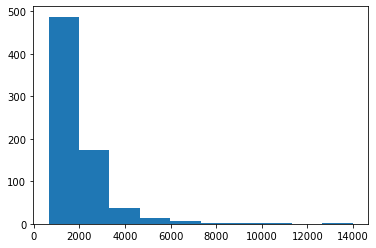

In [49]:
n, bins, patches = plt.hist(x)
plt.show()


In [42]:
len(x)

723